# EDA Report on Wine Quality Data Set

#### Description of the data: 
This dataset can be found on UC Irvine Machine Learning Repository archives. The original owners of the dataset are named “Forina, M. et al, PARVUS – “. The dataset is classified as “An Extendible Package for Data Exploration, Classification and Correlation”. According to UCI, these data results from a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituent found in each of the three types of wine.

######  Objectives are:
    * Investigate data to perform exploratory data analysis
    * Data cleaning by identifying missing values
    * Finding the quality of wine from the dataset
    * Graphical plot identifying to represent data
    * To calculate different summary measures
    * Conduct appropriate mean and proportion tests. 
    * Fit a suitable model to predict the quality of the wine


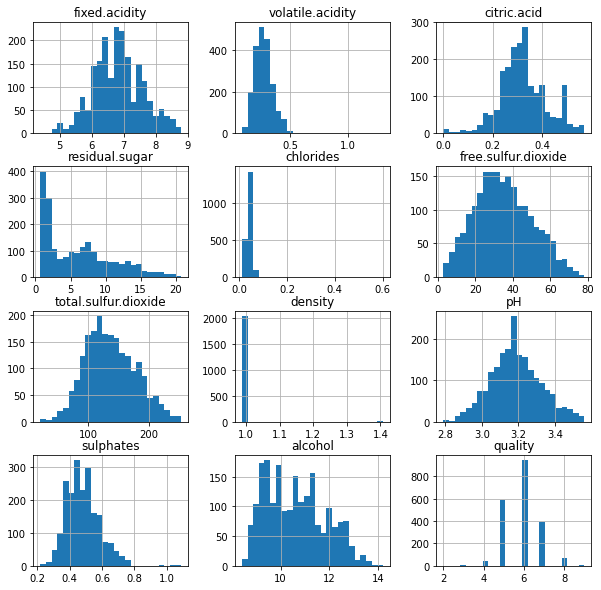

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('D:\DataSciencePortfolio\Datasets\winedata.csv', sep=',')

# X is the last two digits of my ID 20215041

X = .41

# Adding four rows

datarowsSeries = [pd.Series([7.8+X, .88+X, 0.00+X, 1.9, 0.09+X, 25.0+X, 67.0+X, .991+X, 3.22, 0.68+X, 9.8+X, 7],
                index=df.columns), pd.Series([7.2+X, .83+X, 0.01+X, 2.2, 0.19+X, 15.0+X, 60.0+X, .996+X, 3.52, 0.55+X, 9.6+X, 6],
                index=df.columns), pd.Series([7.9+X, .89+X, 0.01+X, 1.7, 0.08+X, 22.0+X, 57.0+X, .997+X, 3.26, 0.64+X, 9.8+X, 2],
                index=df.columns), pd.Series([7.7+X, .86+X, 0.02+X, 2.3, 0.07+X, 11.0+X, 38.0+X, .994+X, 3.12, 0.08+X, 9.4+X, 3],
                index=df.columns)]

new_data = df.append(datarowsSeries , ignore_index=True)

new_data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

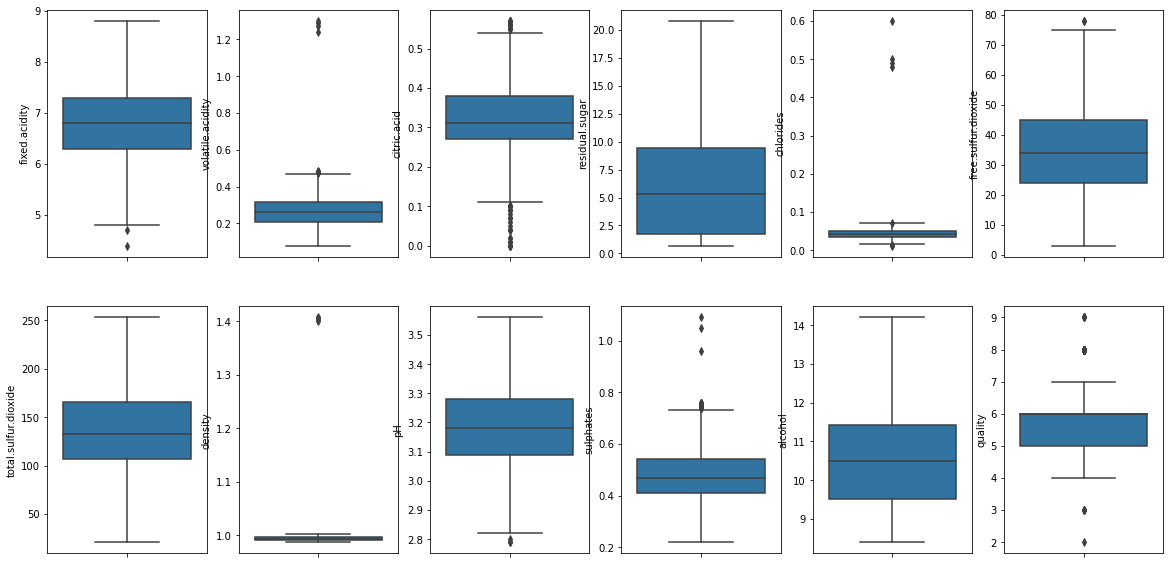

In [10]:
def plot_boxplot(new_data, ft):
    new_data.boxplot(column=[ft])
    plot.grid(False)
    plt.show()

# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in new_data.items():
    if col != 'type':
        sns.boxplot(y=col, data=new_data, ax=ax[index])
        index += 1

### Finfing the outliears and missing values

In [28]:
# Missing Values
print(df.isna().sum())

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
def outliers(new_data, ft):
    Q1 = new_data[ft].quantile(0.25)
    Q3 = new_data[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 
    
    ls = new_data.index[ (new_data[ft] < lower_bound) | (new_data[ft] > upper_bound)]
    return ls

outlier_find = []

for feature in new_data.columns:
    outlier_find.extend(outliers(new_data, feature))

### Removing the outliers

In [12]:
outlier_find

[1051,
 1838,
 237,
 499,
 845,
 860,
 1029,
 1122,
 1378,
 1696,
 1710,
 1852,
 1864,
 2037,
 2038,
 2039,
 2040,
 82,
 131,
 135,
 194,
 222,
 237,
 239,
 247,
 257,
 266,
 294,
 356,
 376,
 404,
 426,
 445,
 602,
 676,
 698,
 717,
 865,
 1011,
 1029,
 1076,
 1094,
 1114,
 1242,
 1260,
 1262,
 1263,
 1277,
 1288,
 1310,
 1346,
 1368,
 1370,
 1371,
 1395,
 1463,
 1470,
 1517,
 1544,
 1571,
 1596,
 1623,
 1666,
 1708,
 1800,
 1813,
 1826,
 1867,
 1933,
 2016,
 92,
 117,
 542,
 2037,
 2038,
 2039,
 2040,
 1618,
 1931,
 2037,
 2038,
 2039,
 2040,
 4,
 133,
 747,
 70,
 157,
 241,
 420,
 741,
 824,
 860,
 947,
 1152,
 1230,
 1266,
 1292,
 1298,
 1337,
 1350,
 1471,
 1521,
 1549,
 1651,
 1748,
 1818,
 1875,
 1889,
 1943,
 2037,
 2038,
 2039,
 11,
 33,
 38,
 45,
 68,
 121,
 162,
 166,
 182,
 185,
 217,
 256,
 321,
 347,
 365,
 372,
 378,
 385,
 397,
 408,
 418,
 492,
 544,
 603,
 605,
 674,
 756,
 778,
 782,
 792,
 797,
 800,
 807,
 907,
 922,
 989,
 1009,
 1018,
 1051,
 1054,
 1067,
 1081,


In [13]:
def remove(new_data, ls):
    ls = sorted(set(ls))
    new_data = new_data.drop(ls)
    return new_data
df_cleaned = remove(new_data, outlier_find)

In [14]:
df_cleaned.shape

(1872, 12)

In [15]:
new_data.tail()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2036,5.70,0.22,0.28,1.3,0.027,26.00,101.00,0.98948,3.35,0.38,12.50,7.0
2037,8.21,1.29,0.41,1.9,0.500,25.41,67.41,1.40100,3.22,1.09,10.21,7.0
2038,7.61,1.24,0.42,2.2,0.600,15.41,60.41,1.40600,3.52,0.96,10.01,6.0
2039,8.31,1.30,0.42,1.7,0.490,22.41,57.41,1.40700,3.26,1.05,10.21,2.0
2040,8.11,1.27,0.43,2.3,0.480,11.41,38.41,1.40400,3.12,0.49,9.81,3.0


### Constructing suitable plots of the data.

Text(0, 0.5, 'alcohol')

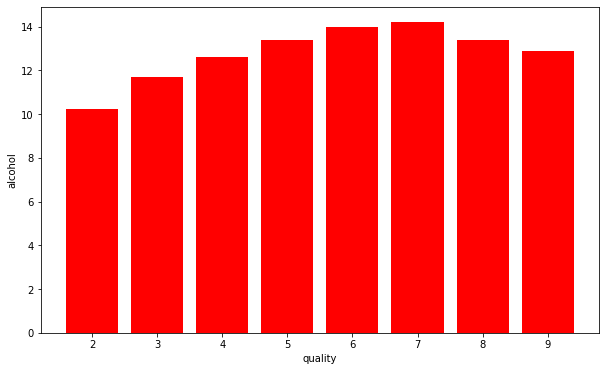

In [16]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(new_data['quality'],new_data['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

### Ploting heatmap

<AxesSubplot:>

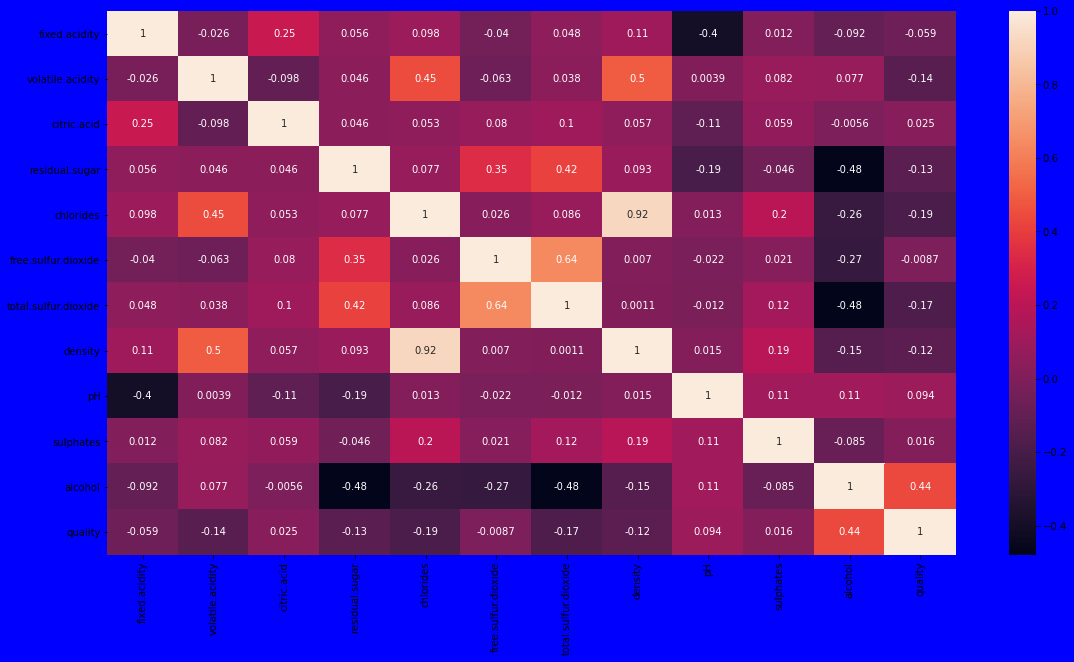

In [17]:

plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(new_data.corr(),annot=True)

In [18]:
for a in range(len(new_data.corr().columns)):
    for b in range(a):
        if abs(new_data.corr().iloc[a,b]) >0.7:
            name = new_data.corr().columns[a]
            print(name)


density


In [19]:
new_df=new_data.drop('total.sulfur.dioxide',axis=1)

In [20]:
new_df.isnull().sum()

fixed.acidity          0
volatile.acidity       0
citric.acid            0
residual.sugar         0
chlorides              0
free.sulfur.dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

### Finding Logit Result

In [21]:
new_df.update(new_df.fillna(new_df.mean()))

In [22]:
new_df['quality'] = new_df['quality'].where(new_df['quality']>5, 1)
new_df['quality'] = new_df['quality'].where(new_df['quality']<= 5, 0)

In [23]:
new_df['quality'].head(50)

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
5     0.0
6     0.0
7     1.0
8     1.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    1.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    1.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    1.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: quality, dtype: float64

In [24]:
y = new_df['quality']
x = new_df.drop(['quality'], axis='columns')
logitmodel = sm.Logit(y,x)
result = logitmodel.fit()
print(result.summary2() )
X = sm.add_constant(x)
logitmodel2 = sm.Logit(y,X)
result2 = logitmodel2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.503449
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.187     
Dependent Variable:   quality            AIC:                2075.0788 
Date:                 2022-02-13 22:41   BIC:                2131.2908 
No. Observations:     2041               Log-Likelihood:     -1027.5   
Df Model:             9                  LL-Null:            -1264.6   
Df Residuals:         2031               LLR p-value:        1.9606e-96
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                     Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
fixed.acidity         0.1160   0.0803   1.4455 0.1483  -0.0413 